In [1]:
%%time

import psi4

CPU times: user 363 ms, sys: 276 ms, total: 639 ms
Wall time: 1.49 s


In [2]:
%%time

psi4.core.set_output_file('output.dat', False)

CPU times: user 375 µs, sys: 186 µs, total: 561 µs
Wall time: 870 µs


In [3]:
%%time

#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 375 ms, sys: 88.1 ms, total: 463 ms
Wall time: 1.74 s


-76.0266327350902

In [4]:
%%time

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')


CPU times: user 281 ms, sys: 6.41 ms, total: 287 ms
Wall time: 386 ms


-38.92533462893707

In [5]:
%%time

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 838 ms, sys: 44.5 ms, total: 882 ms
Wall time: 979 ms


-76.02703272937481

In [6]:
%%time

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 987 ms, sys: 63.3 ms, total: 1.05 s
Wall time: 1.08 s


In [7]:
%%time

# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.1 ms, sys: 18 µs, total: 1.12 ms
Wall time: 1.13 ms


In [8]:
%%time

psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.96 s, sys: 354 ms, total: 4.31 s
Wall time: 4.51 s


-0.0022355823909805178

In [9]:
%%time

#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.69 s, sys: 1.55 s, total: 7.24 s
Wall time: 11.3 s


In [11]:
#! Potential energy surface scan and CP-correction for Ar2

import numpy as np

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.linspace(3.5,6)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.6                        0.094473
            3.6                        0.035429
            3.7                        -0.010354
            3.7                        -0.045390
            3.8                        -0.071751
            3.8                        -0.091141
            3.9                        -0.104955
            3.9                        -0.114333
            4.0                        -0.120205
            4.0                        -0.123324
            4.1                        -0.124302
            4.1                        -0.123633
            4.2                        -0.121713
            4.2                        -0.118862
            4.3                        -0.115333
            4.3                        -0.11133

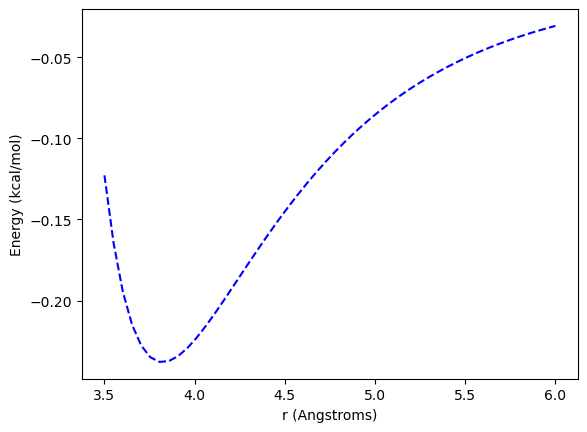

In [32]:
# fitting computed energies to LJ potential

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

#LJ parameters for Ar
sigma = 3.405
eps = 0.238

#plot LJ curve
y = []
for r in Rvals:
    y.append(lj(r, sigma, eps))

plt.plot(Rvals, y, 'b--')
plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.show()

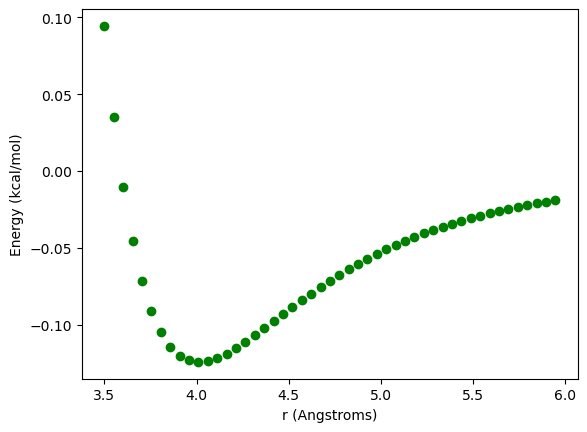

In [33]:
#plot data

energies = [0.094473, 0.035429, -0.010354, -0.045390, -0.071751, -0.091141, -0.104955, -0.114333, -0.120205, -0.123324,
-0.124302, -0.123633, -0.121713, -0.118862, -0.115333, -0.111330, -0.107014, -0.102510, -0.097918, -0.093312,
-0.088753, -0.084283, -0.079935 ,-0.075731,-0.071688, -0.067816, -0.064119, -0.060599, -0.057256, -0.054087,
-0.051088, -0.048253, -0.045577, -0.043052, -0.040672, -0.038429, -0.036318, -0.034330, -0.032460,-0.030700,
-0.029045, -0.027487, -0.026023, -0.024645, -0.023348, -0.022128, -0.020980, -0.019900, -0.018882]

plt.plot(Rvals[0:-1], energies, 'go')
plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.show()

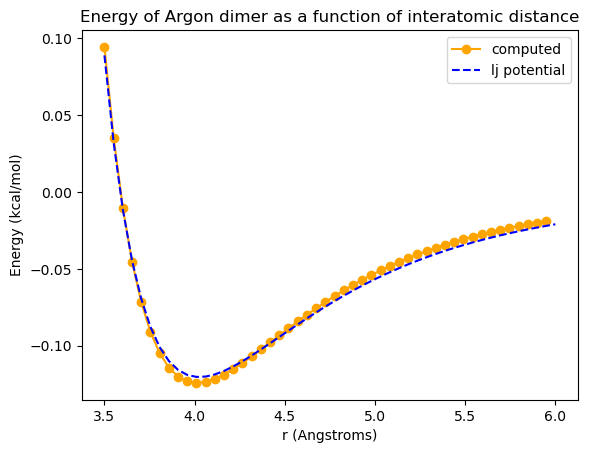

In [37]:
popt, pcov = curve_fit(lj, Rvals[0:-1], energies)

plt.plot(Rvals[0:-1], energies, color='orange', marker='o', label = 'computed')

plt.plot(Rvals, lj(Rvals, *popt), 'b--', label='lj potential')

plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.legend()
plt.title('Energy of Argon dimer as a function of interatomic distance')
plt.savefig('E vs r for Ar')
plt.show()